In [1]:
import pandas as pd

In [2]:
'''
Total set of authors
'''
df = pd.read_csv('../data/raw/The-Technical-Debt-Dataset-CSV/GIT_COMMITS.csv')
df['AUTHOR'].unique()

array(['No Author', 'James Duncan Davidson', 'Dean Jackson',
       'Stephane Hillion', 'Vincent Hardy', 'Thierry Kormann', 'billh',
       'Christophe Jolif', 'Thomas E. DeWeese', 'Stefeno Mazzocchi',
       'Bella Robinson', 'Nicolas Socheleau', 'Cameron McCormack',
       'Jeremias Maerki', 'Dieter von Holten', 'Clay Leeds',
       'Helder Miguel Alves Magalhães', 'Vincent Hennebert',
       'Luis Bernardo', 'Glenn Adams', 'Simon Steiner', 'Pier Fumagalli',
       'Sam Ruby', 'Sylvain Wallez', 'Carsten Ziegeler',
       'Stephan Michels', 'Outerthought - Bruno Dumon', 'Jeff Turner',
       'Bernhard Huber', 'Vadim Gritsenko', 'Michael Melhem',
       'Torsten Curdt', 'Berin Loritsch', 'Christian Haul',
       'Jeremy Quinn', 'David Crossley', 'Outerthought - Steven Noels',
       'Marcus Crafter', 'Christopher Oliver', 'Mark Butler',
       'Diana Shannon', 'Nicola Ken Barozzi', 'Bertrand Delacretaz',
       'Konstantin Piroumian', 'Andrew Savory',
       'Geoffrey Alexander Howard'

In [3]:
'''
Authors grouped by project
'''
by_project = df.groupby('PROJECT_ID')
by_project['AUTHOR'].unique()

PROJECT_ID
org.apache:archiva               [Brett Porter, Edwin L. Punzalan, Jason van Zy...
org.apache:batik                 [No Author, James Duncan Davidson, Dean Jackso...
org.apache:bcel                  [No Author, Sam Ruby, Jason van Zyl, Markus Da...
org.apache:beanutils             [No Author, Craig R. McClanahan, Geir Magnusso...
org.apache:cayenne               [Andrus Adamchik, Michael Ray Gentry, Kevin Jo...
org.apache:cocoon                [No Author, Pier Fumagalli, Sam Ruby, Sylvain ...
org.apache:codec                 [No Author, Timothy O'Brien, Gary D. Gregory, ...
org.apache:collections           [No Author, Rodney Waldhoff, Craig R. McClanah...
org.apache:commons-cli           [No Author, James Strachan, John Keyes, Henri ...
org.apache:commons-exec          [Brett Porter, Trygve Laugstol, Niklas Gustavs...
org.apache:commons-fileupload    [Unknown Author, John McNally, Jason van Zyl, ...
org.apache:commons-io            [nan, Scott Sanders, Henri Yandell, Daniel 

In [4]:
'''
Number of authors per project
'''
for row in by_project['AUTHOR'].unique().iteritems():
    print(row[0],len(row[1]))

org.apache:archiva 16
org.apache:batik 21
org.apache:bcel 30
org.apache:beanutils 46
org.apache:cayenne 5
org.apache:cocoon 74
org.apache:codec 34
org.apache:collections 67
org.apache:commons-cli 47
org.apache:commons-exec 20
org.apache:commons-fileupload 40
org.apache:commons-io 67
org.apache:commons-jelly 40
org.apache:commons-jexl 33
org.apache:configuration 30
org.apache:daemon 27
org.apache:dbcp 51
org.apache:dbutils 31
org.apache:digester 32
org.apache:felix 65
org.apache:hive 44
org.apache:httpclient 46
org.apache:httpcore 38
org.apache:jxpath 24
org.apache:net 27
org.apache:ognl 11
org.apache:santuario 19
org.apache:thrift 27
org.apache:validator 41
org.apache:vfs 36
org.apache:zookeeper 132


## Data quality:

How many commits we have in total?
How many commits we have per author?
Is there any author without commits?
How may jira issues do we have?
How many jira issues donnot have a corresponding commit?
How many commits donnot have a corresponding jira issues?

In [5]:
path1 = "../data/raw/The-Technical-Debt-Dataset-CSV/GIT_COMMITS.csv"
path2 = "../data/raw/The-Technical-Debt-Dataset-CSV/SONAR_ANALYSIS.csv"
path3 = "../data/raw/The-Technical-Debt-Dataset-CSV/SONAR_MEASURES.csv"
path4 = "../data/raw/The-Technical-Debt-Dataset-CSV/SONAR_ISSUES.csv"
db_commits = pd.read_csv(path1)
db_analysis = pd.read_csv(path2)
db_measures = pd.read_csv(path3)
db_s_issues = pd.read_csv(path4)

In [6]:
db_commits.head()

,PROJECT_ID,COMMIT_HASH,COMMIT_MESSAGE,AUTHOR,AUTHOR_DATE,AUTHOR_TIMEZONE,COMMITTER,COMMITER_DATE,COMMITTER_TIMEZONE,BRANCHES,IN_MAIN_BRANCH,MERGE,PARENTS
0,org.apache:batik,52fc76012c5f969145c39d3fb398a7c2c094474f,New repository initialized by cvs2svn.\n\ngit-...,No Author,2000-10-01T07:37:01Z,0,No Author,2000-10-01T07:37:01Z,0,['trunk'],True,False,[]
1,org.apache:batik,b1ff4af6abfec32fc710d77795bb20a612a82126,Initial revision\n\n\ngit-svn-id: https://svn....,James Duncan Davidson,2000-10-01T07:37:01Z,0,James Duncan Davidson,2000-10-01T07:37:01Z,0,['trunk'],True,False,['52fc76012c5f969145c39d3fb398a7c2c094474f']
2,org.apache:batik,c8d7a13470987f892f7466d55c10e3cee34de31d,Update\nPR:\n\n\ngit-svn-id: https://svn.apach...,James Duncan Davidson,2000-10-01T07:40:39Z,0,James Duncan Davidson,2000-10-01T07:40:39Z,0,['trunk'],True,False,['b1ff4af6abfec32fc710d77795bb20a612a82126']
3,org.apache:batik,93a16402b48ae1cf70ea4bd030479170749bd10a,Added question line (more a test of list/forwa...,James Duncan Davidson,2000-10-01T08:15:04Z,0,James Duncan Davidson,2000-10-01T08:15:04Z,0,['trunk'],True,False,['c8d7a13470987f892f7466d55c10e3cee34de31d']
4,org.apache:batik,fcaecb541edc03f36b6ec7a792e97dfeabf26117,testing commit\n\n\ngit-svn-id: https://svn.ap...,Dean Jackson,2000-10-02T13:33:11Z,0,Dean Jackson,2000-10-02T13:33:11Z,0,['trunk'],True,False,['93a16402b48ae1cf70ea4bd030479170749bd10a']


In [7]:
db_measures.head()

,project_id,analysis_key,complexity,file_complexity,complexity_in_classes,class_complexity,complexity_in_functions,function_complexity,class_complexity_distribution,function_complexity_distribution,...,sg_i.JAVA_CYCLIC_PACKAGES_PERCENT,sg_i.MAX_MODULE_NCCD,sg_i.ARCHITECTURE_FEATURE_AVAILABLE,sg_i.NUMBER_OF_ISSUES,sg_i.NUMBER_OF_CRITICAL_ISSUES_WITHOUT_RESOLUTION,sg_i.VIOLATING_COMPONENTS_PERCENT,sg_i.UNASSIGNED_COMPONENTS_PERCENT,sg_i.NUMBER_OF_THRESHOLD_VIOLATIONS,sg_i.NUMBER_OF_WORKSPACE_WARNINGS,sg_i.NUMBER_OF_IGNORED_CRITICAL_ISSUES
0,org.apache:cayenne,AWedEXD3C4KKKThcCqHV,30703.0,11.5,30387.0,10.9,29441.0,1.7,NaN,"1=11568,2=2821,4=891,6=307,8=164,10=97,12=147",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,org.apache:cayenne,AWedCu_QC4KKKThcCqGv,30703.0,11.5,NaN,10.9,NaN,1.7,NaN,"1=11568,2=2821,4=891,6=307,8=164,10=97,12=147",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,org.apache:cayenne,AWedBDbIC4KKKThcCqGA,30703.0,11.5,NaN,10.9,NaN,1.7,NaN,"1=11568,2=2821,4=891,6=307,8=164,10=97,12=147",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,org.apache:cayenne,AWec_b8nC4KKKThcCqFg,30699.0,11.5,NaN,10.9,NaN,1.7,NaN,"1=11566,2=2821,4=891,6=307,8=164,10=97,12=147",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,org.apache:cayenne,AWec904qC4KKKThcCqE3,30670.0,11.5,NaN,10.9,NaN,1.7,NaN,"1=11556,2=2819,4=891,6=306,8=164,10=97,12=147",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(db_measures['complexity'].notna().count())
print(db_measures['analysis_key'].notna().count())
print(db_measures.shape)
print(len(db_measures['analysis_key'].unique()))
print('Any analysis key not in sonar measures?')
clean_db_measures = db_measures[db_measures['analysis_key'].notna()]
print(clean_db_measures[~clean_db_measures['analysis_key'].isin(db_analysis['ANALYSIS_KEY'])].shape)

66711
66711
(66711, 240)
66711
Any analysis key not in sonar measures?
(0, 240)


In [9]:
db_analysis.head()

,PROJECT_ID,ANALYSIS_KEY,DATE,REVISION
0,org.apache:cayenne,AWedEXD3C4KKKThcCqHV,2008-07-07 14:52:05,b9988a83e364b9b470873dff8996dcf401d08dc4
1,org.apache:cayenne,AWedCu_QC4KKKThcCqGv,2008-07-07 12:31:47,5d351ea375f2b8d4ca0ae40b887392915983121a
2,org.apache:cayenne,AWedBDbIC4KKKThcCqGA,2008-07-05 18:54:27,2bb54cc863c9c599e316ae5da7ba1a77f42e9402
3,org.apache:cayenne,AWec_b8nC4KKKThcCqFg,2008-07-03 20:21:40,68b851d2adbbeee6014d1c37b9c07fdb4fc6820f
4,org.apache:cayenne,AWec904qC4KKKThcCqE3,2008-07-02 00:12:36,e6c057bd6a04ec286d4ac4da5d2a82696868b937


In [10]:
not_na = db_analysis['ANALYSIS_KEY'].notna().count()
unique = len(db_analysis[db_analysis['ANALYSIS_KEY'].notna()]['ANALYSIS_KEY'].unique())
print('Total rows:',db_analysis.shape[0])
print('NA in analysis key:',db_analysis.shape[0] - not_na)
print('Unique analysis key:',unique)
print('Duplicate analysis key:',not_na - unique)
print('Any analysis key not in sonar measures?')
clean_db_analysis = db_analysis[db_analysis['ANALYSIS_KEY'].notna()]
print(clean_db_analysis[~clean_db_analysis['ANALYSIS_KEY'].isin(db_measures['analysis_key'])].shape)

Total rows: 67550
NA in analysis key: 0
Unique analysis key: 66711
Duplicate analysis key: 839
Any analysis key not in sonar measures?
(0, 4)


why is there duplicate sonar analysis observations??

In [11]:
db_s_issues.head()

,PROJECT_ID,CREATION_ANALYSIS_KEY,ISSUE_KEY,TYPE,RULE,SEVERITY,STATUS,RESOLUTION,EFFORT,DEBT,...,MESSAGE,COMPONENT,START_LINE,END_LINE,START_OFFSET,END_OFFSET,HASH,FROM_HOTSPOT,NOT_FOUND,CLOSE_ANALYSIS_KEY
0,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWeF1RcPC4KKKThcBEZ8,CODE_SMELL,squid:S1133,INFO,OPEN,NaN,10.0,10.0,...,Do not forget to remove this deprecated code s...,Apache_Cayenne:framework/cayenne-jdk1.5-unpubl...,39.0,39.0,27.0,37.0,NaN,NaN,0,NaN
1,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWeF1RcRC4KKKThcBEZ9,CODE_SMELL,squid:S1133,INFO,OPEN,NaN,10.0,10.0,...,Do not forget to remove this deprecated code s...,Apache_Cayenne:framework/cayenne-jdk1.5-unpubl...,45.0,45.0,27.0,38.0,NaN,NaN,0,NaN
2,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWeF1RcSC4KKKThcBEZ-,CODE_SMELL,squid:S1133,INFO,OPEN,NaN,10.0,10.0,...,Do not forget to remove this deprecated code s...,Apache_Cayenne:framework/cayenne-jdk1.5-unpubl...,51.0,51.0,24.0,37.0,NaN,NaN,0,NaN
3,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWeF1RcSC4KKKThcBEZ_,CODE_SMELL,squid:S1133,INFO,OPEN,NaN,10.0,10.0,...,Do not forget to remove this deprecated code s...,Apache_Cayenne:framework/cayenne-jdk1.5-unpubl...,59.0,59.0,24.0,38.0,NaN,NaN,0,NaN
4,org.apache:cayenne,AWd5_psxC4KKKThc-qK6,AWd5_rilC4KKKThc-rwE,CODE_SMELL,squid:S1135,INFO,CLOSED,FIXED,NaN,NaN,...,Complete the task associated to this TODO comm...,Apache_Cayenne:framework/cayenne-jdk1.4-unpubl...,33.0,33.0,0.0,71.0,NaN,NaN,0,AWeF1Ou7C4KKKThcBEZc


In [12]:
print('Total rows:',db_s_issues.shape[0])
print('NAs in creation analysis key:',db_s_issues.shape[0] - db_s_issues['CREATION_ANALYSIS_KEY'].notna().count())
print('Duplicate creation analysis keys:',len(db_s_issues['CREATION_ANALYSIS_KEY'].unique()))
print('Number of unique issue keys:',len(db_s_issues['ISSUE_KEY'].unique()))
print('Different kind of errors:',db_s_issues['TYPE'].unique())
print('Different severities of errors:',db_s_issues['SEVERITY'].unique())
db_s_issues['TS'] = db_s_issues[['TYPE', 'SEVERITY']].apply(lambda x: ''.join(x), axis=1)
print('Different combinations of severity and type:',db_s_issues['TS'].unique())

Total rows: 1024614
NAs in creation analysis key: 0
Duplicate creation analysis keys: 18251
Number of unique issue keys: 1024614
Different kind of errors: ['CODE_SMELL' 'BUG' 'VULNERABILITY']
Different severities of errors: ['INFO' 'MINOR' 'MAJOR' 'CRITICAL' 'BLOCKER']
Different combinations of severity and type: ['CODE_SMELLINFO' 'CODE_SMELLMINOR' 'CODE_SMELLMAJOR' 'BUGMAJOR'
 'VULNERABILITYMAJOR' 'CODE_SMELLCRITICAL' 'BUGCRITICAL'
 'VULNERABILITYCRITICAL' 'CODE_SMELLBLOCKER' 'BUGBLOCKER']


Why is there duplicates in the creation analysis key??

Because an analysis key can generate different number of issues, for example a warning and a blocking bug at the same time.

In [13]:
'''
Merge analysis and measures
'''
db_sonar0 = clean_db_analysis.set_index('ANALYSIS_KEY').join(db_measures.set_index('analysis_key'))
db_sonar = db_sonar0.rename(columns={'REVISION': 'COMMIT_HASH'})
db_sonar.head()

,PROJECT_ID,DATE,COMMIT_HASH,project_id,complexity,file_complexity,complexity_in_classes,class_complexity,complexity_in_functions,function_complexity,...,sg_i.JAVA_CYCLIC_PACKAGES_PERCENT,sg_i.MAX_MODULE_NCCD,sg_i.ARCHITECTURE_FEATURE_AVAILABLE,sg_i.NUMBER_OF_ISSUES,sg_i.NUMBER_OF_CRITICAL_ISSUES_WITHOUT_RESOLUTION,sg_i.VIOLATING_COMPONENTS_PERCENT,sg_i.UNASSIGNED_COMPONENTS_PERCENT,sg_i.NUMBER_OF_THRESHOLD_VIOLATIONS,sg_i.NUMBER_OF_WORKSPACE_WARNINGS,sg_i.NUMBER_OF_IGNORED_CRITICAL_ISSUES
ANALYSIS_KEY,,,,,,,,,,,,,,,,,,,,,
AWedEXD3C4KKKThcCqHV,org.apache:cayenne,2008-07-07 14:52:05,b9988a83e364b9b470873dff8996dcf401d08dc4,org.apache:cayenne,30703.0,11.5,30387.0,10.9,29441.0,1.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AWedCu_QC4KKKThcCqGv,org.apache:cayenne,2008-07-07 12:31:47,5d351ea375f2b8d4ca0ae40b887392915983121a,org.apache:cayenne,30703.0,11.5,NaN,10.9,NaN,1.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AWedBDbIC4KKKThcCqGA,org.apache:cayenne,2008-07-05 18:54:27,2bb54cc863c9c599e316ae5da7ba1a77f42e9402,org.apache:cayenne,30703.0,11.5,NaN,10.9,NaN,1.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AWec_b8nC4KKKThcCqFg,org.apache:cayenne,2008-07-03 20:21:40,68b851d2adbbeee6014d1c37b9c07fdb4fc6820f,org.apache:cayenne,30699.0,11.5,NaN,10.9,NaN,1.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AWec904qC4KKKThcCqE3,org.apache:cayenne,2008-07-02 00:12:36,e6c057bd6a04ec286d4ac4da5d2a82696868b937,org.apache:cayenne,30670.0,11.5,NaN,10.9,NaN,1.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
s_issues_no_commit = db_sonar[~db_sonar['COMMIT_HASH'].isin(db_commits['COMMIT_HASH'])].shape[0]
print('Any sonar issue without commit?:', s_issues_no_commit)
db_sonar[~db_sonar['COMMIT_HASH'].isin(db_commits['COMMIT_HASH'])].head()

Any sonar issue without commit?: 26341


,PROJECT_ID,DATE,COMMIT_HASH,project_id,complexity,file_complexity,complexity_in_classes,class_complexity,complexity_in_functions,function_complexity,...,sg_i.JAVA_CYCLIC_PACKAGES_PERCENT,sg_i.MAX_MODULE_NCCD,sg_i.ARCHITECTURE_FEATURE_AVAILABLE,sg_i.NUMBER_OF_ISSUES,sg_i.NUMBER_OF_CRITICAL_ISSUES_WITHOUT_RESOLUTION,sg_i.VIOLATING_COMPONENTS_PERCENT,sg_i.UNASSIGNED_COMPONENTS_PERCENT,sg_i.NUMBER_OF_THRESHOLD_VIOLATIONS,sg_i.NUMBER_OF_WORKSPACE_WARNINGS,sg_i.NUMBER_OF_IGNORED_CRITICAL_ISSUES
ANALYSIS_KEY,,,,,,,,,,,,,,,,,,,,,
AWedEXD3C4KKKThcCqHV,org.apache:cayenne,2008-07-07 14:52:05,b9988a83e364b9b470873dff8996dcf401d08dc4,org.apache:cayenne,30703.0,11.5,30387.0,10.9,29441.0,1.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AWedCu_QC4KKKThcCqGv,org.apache:cayenne,2008-07-07 12:31:47,5d351ea375f2b8d4ca0ae40b887392915983121a,org.apache:cayenne,30703.0,11.5,NaN,10.9,NaN,1.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AWedBDbIC4KKKThcCqGA,org.apache:cayenne,2008-07-05 18:54:27,2bb54cc863c9c599e316ae5da7ba1a77f42e9402,org.apache:cayenne,30703.0,11.5,NaN,10.9,NaN,1.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AWec_b8nC4KKKThcCqFg,org.apache:cayenne,2008-07-03 20:21:40,68b851d2adbbeee6014d1c37b9c07fdb4fc6820f,org.apache:cayenne,30699.0,11.5,NaN,10.9,NaN,1.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AWec904qC4KKKThcCqE3,org.apache:cayenne,2008-07-02 00:12:36,e6c057bd6a04ec286d4ac4da5d2a82696868b937,org.apache:cayenne,30670.0,11.5,NaN,10.9,NaN,1.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
commits_no_s_issue = db_commits[~db_commits['COMMIT_HASH'].isin(db_sonar['COMMIT_HASH'])].shape[0]
print('Any without commit without a sonar issue?:',commits_no_s_issue)
db_commits[~db_commits['COMMIT_HASH'].isin(db_sonar['COMMIT_HASH'])].head()

Any without commit without a sonar issue?: 40702


,PROJECT_ID,COMMIT_HASH,COMMIT_MESSAGE,AUTHOR,AUTHOR_DATE,AUTHOR_TIMEZONE,COMMITTER,COMMITER_DATE,COMMITTER_TIMEZONE,BRANCHES,IN_MAIN_BRANCH,MERGE,PARENTS
0,org.apache:batik,52fc76012c5f969145c39d3fb398a7c2c094474f,New repository initialized by cvs2svn.\n\ngit-...,No Author,2000-10-01T07:37:01Z,0,No Author,2000-10-01T07:37:01Z,0,['trunk'],True,False,[]
1,org.apache:batik,b1ff4af6abfec32fc710d77795bb20a612a82126,Initial revision\n\n\ngit-svn-id: https://svn....,James Duncan Davidson,2000-10-01T07:37:01Z,0,James Duncan Davidson,2000-10-01T07:37:01Z,0,['trunk'],True,False,['52fc76012c5f969145c39d3fb398a7c2c094474f']
2,org.apache:batik,c8d7a13470987f892f7466d55c10e3cee34de31d,Update\nPR:\n\n\ngit-svn-id: https://svn.apach...,James Duncan Davidson,2000-10-01T07:40:39Z,0,James Duncan Davidson,2000-10-01T07:40:39Z,0,['trunk'],True,False,['b1ff4af6abfec32fc710d77795bb20a612a82126']
3,org.apache:batik,93a16402b48ae1cf70ea4bd030479170749bd10a,Added question line (more a test of list/forwa...,James Duncan Davidson,2000-10-01T08:15:04Z,0,James Duncan Davidson,2000-10-01T08:15:04Z,0,['trunk'],True,False,['c8d7a13470987f892f7466d55c10e3cee34de31d']
4,org.apache:batik,fcaecb541edc03f36b6ec7a792e97dfeabf26117,testing commit\n\n\ngit-svn-id: https://svn.ap...,Dean Jackson,2000-10-02T13:33:11Z,0,Dean Jackson,2000-10-02T13:33:11Z,0,['trunk'],True,False,['93a16402b48ae1cf70ea4bd030479170749bd10a']


In [16]:
db = db_sonar.reset_index().set_index('COMMIT_HASH').join(db_commits.reset_index().set_index("COMMIT_HASH"),how = 'inner',lsuffix='2').reset_index()
n_intersection = db.shape[0]
print('Total commits:',db_commits.shape[0])
print('Total issues:',db_sonar.shape[0])
print('Commits without a sonar issue:',commits_no_s_issue)
print('Sonar issue without a commit:',s_issues_no_commit)
print('Intersection of commits and issues:',n_intersection)
db.head()

Total commits: 81072
Total issues: 66711
Commits without a sonar issue: 40702
Sonar issue without a commit: 26341
Intersection of commits and issues: 40370


,COMMIT_HASH,ANALYSIS_KEY,PROJECT_ID2,DATE,project_id,complexity,file_complexity,complexity_in_classes,class_complexity,complexity_in_functions,...,AUTHOR,AUTHOR_DATE,AUTHOR_TIMEZONE,COMMITTER,COMMITER_DATE,COMMITTER_TIMEZONE,BRANCHES,IN_MAIN_BRANCH,MERGE,PARENTS
0,2a8acf70fc536298fdbde4996423173d71e81e47,AWd-LRcvC4KKKThc_04Z,org.apache:cayenne,2007-03-09 12:38:17,org.apache:cayenne,26478.0,11.5,NaN,10.9,NaN,...,Andrus Adamchik,2007-03-09 12:38:17+00:00,0,Andrus Adamchik,2007-03-09 12:38:17+00:00,0,"['(HEAD detached at e05c87b)', 'master']",False,False,['40f0535450da2f42d567baaa4493d0868ce56c29']
1,09a2a267a67b38b5a7f5b14c1fa7312fc67c5947,AWd-Ht_VC4KKKThc_0Zd,org.apache:cayenne,2007-03-09 12:36:27,org.apache:cayenne,26476.0,11.5,NaN,10.9,NaN,...,Andrus Adamchik,2007-03-09 12:36:27+00:00,0,Andrus Adamchik,2007-03-09 12:36:27+00:00,0,"['(HEAD detached at e05c87b)', 'master']",False,False,['fa5f7734aa45a448463d44ec7474326f978710c1']
2,7b5ce0ab4a442259a4274de9e73c5c1bf4a5aaec,AWd-CHEzC4KKKThc_zzS,org.apache:cayenne,2007-03-07 18:10:05,org.apache:cayenne,26473.0,11.5,NaN,10.9,NaN,...,Andrus Adamchik,2007-03-07 18:10:05+00:00,0,Andrus Adamchik,2007-03-07 18:10:05+00:00,0,"['(HEAD detached at e05c87b)', 'master']",False,False,['c3bc6b0a63393166e97d0bcdf9f2778307d8d21a']
3,c3bc6b0a63393166e97d0bcdf9f2778307d8d21a,AWd-AVznC4KKKThc_zjv,org.apache:cayenne,2007-03-07 17:58:21,org.apache:cayenne,26473.0,11.5,NaN,10.9,NaN,...,Andrus Adamchik,2007-03-07 17:58:21+00:00,0,Andrus Adamchik,2007-03-07 17:58:21+00:00,0,"['(HEAD detached at e05c87b)', 'master']",False,False,['06c06ce6b484f7da4f8c4ad8174e9c4c824703b0']
4,552b9117dba3cf831812daf302c199002dbb982f,AWd98nekC4KKKThc_zGI,org.apache:cayenne,2007-03-07 14:15:41,org.apache:cayenne,26471.0,11.5,NaN,10.9,NaN,...,Andrus Adamchik,2007-03-07 14:15:41+00:00,0,Andrus Adamchik,2007-03-07 14:15:41+00:00,0,"['(HEAD detached at e05c87b)', 'master']",False,False,['f46935f715ccbc62693098c86ca3beb6b99b476b']


In [17]:
errors = set(db_s_issues['CREATION_ANALYSIS_KEY'])
keys = set(db['ANALYSIS_KEY'])
print('Number of commits producing errors of any kind:',len(keys.intersection(errors)))

Number of commits producing errors of any kind: 10356


distribution of commits among authors:

In [18]:
by_author = db.groupby('AUTHOR')
by_author
for row in by_author['COMMIT_HASH'].unique().iteritems():
    print(row[0],len(row[1]))

Adrian Crum 8
Adrian Nistor 1
Alan Gates 32
Alex Karasulu 47
Alexander Shraer 11
Amareshwari Sri Ramadasu 23
Andrus Adamchik 137
Antoine Levy-Lambert 1
Antonio Petrelli 1
Arnaud Heritier 1
Arron Claude Bates 2
Arun Thomas 1
Asankha Chamath Perera 16
Ashish Thusoo 50
Ashutosh Chauhan 1057
Benedikt Ritter 418
Benjamin Speakmon 53
Benson Margulies 8
Bernd Eckenfels 126
Bertrand Delacretaz 6
Bill Speirs 26
Bob McWhirter 53
Brent Worden 22
Brett Leslie Porter 3
Brett Porter 564
Brock Noland 143
Bruno D'Avonzo 6
Bruno P. Kinoshita 18
Camille Fournier 5
Carl Franklin Hall 10
Carl Steinbach 174
Carlos Sanchez Gonzalez 51
Carsten Ziegeler 1
Chas Honton 23
Chris Nauroth 15
Christian Grobmeier 57
Conor MacNeill 3
Costin Manolache 1
Craig R. McClanahan 266
Dain Sundstrom 11
Daniel Fabulich 65
Daniel Rall 6
Daniel Savarese 82
Davanum Srinivas 1
David Brosius 211
David Dixon-Peugh 3
David Eric Pugh 110
David Graham 296
David Winterfeldt 39
Dennis Kieselhorst 14
Dennis Lundberg 68
Dhruba Borthakur 34

Authors dissapearing from database:

In [19]:
authors = db_commits['AUTHOR'].unique()
new_authors = list(db['AUTHOR'])
n = 0
for a in authors:
    if a not in new_authors:
        print(a)
        n+=1
print('Original:',len(db_commits['AUTHOR'].unique()),'Lost:',n,'Now:',len(db['AUTHOR'].unique()))

James Duncan Davidson
Dean Jackson
Stephane Hillion
Vincent Hardy
Thierry Kormann
billh
Christophe Jolif
Thomas E. DeWeese
Stefeno Mazzocchi
Bella Robinson
Nicolas Socheleau
Cameron McCormack
Dieter von Holten
Clay Leeds
Helder Miguel Alves Magalhães
Vincent Hennebert
Luis Bernardo
Glenn Adams
Simon Steiner
Pier Fumagalli
Sam Ruby
Sylvain Wallez
Stephan Michels
Outerthought - Bruno Dumon
Bernhard Huber
Michael Melhem
Berin Loritsch
Christian Haul
Jeremy Quinn
David Crossley
Outerthought - Steven Noels
Marcus Crafter
Christopher Oliver
Mark Butler
Diana Shannon
Konstantin Piroumian
Andrew Savory
Geoffrey Alexander Howard
Giacomo Pati
John Morrison
Gianugo Rabellino
Joerg Heinick
Matthew Langham
Upayavira
Poetz Reinhard
Ugo Cei
Guido Casper
Outerthought - Marc Portier
Antonio Gallardo Rivera
Anthony Collen
Unico Hommes
Ricardo Rocha
Michael Wechner
Timothy D. Larson
Par Daniel Fagerstrohm
Andreas Hartmann
Gregor Rothfuss
Rolf Kulemann
Leszek Gawron
Alfred Nathaniel
Helma Van Der Linden
J

We lost a lot of authors!!!!!!!!

Distribution of commits among projects:

In [20]:
by_project = db.groupby('PROJECT_ID')
by_project
dict_new = {}
for row in by_project['COMMIT_HASH'].unique().iteritems():
    print(row[0],len(row[1]))
    dict_new[row[0]] = len(row[1])

org.apache:archiva 1079
org.apache:bcel 1324
org.apache:beanutils 1210
org.apache:cayenne 141
org.apache:codec 1730
org.apache:collections 2765
org.apache:commons-cli 847
org.apache:commons-exec 617
org.apache:commons-fileupload 864
org.apache:commons-io 1910
org.apache:commons-jelly 1937
org.apache:commons-jexl 1532
org.apache:configuration 2929
org.apache:daemon 981
org.apache:dbcp 1555
org.apache:dbutils 602
org.apache:digester 2142
org.apache:felix 513
org.apache:hive 4142
org.apache:httpclient 2714
org.apache:httpcore 1901
org.apache:jxpath 596
org.apache:net 2089
org.apache:ognl 608
org.apache:thrift 1
org.apache:validator 1340
org.apache:vfs 2079
org.apache:zookeeper 222


Original distribution of commits among projects

In [21]:
by_project = db_commits.groupby('PROJECT_ID')
by_project
dict_old = {}
for row in by_project['COMMIT_HASH'].unique().iteritems():
    print(row[0],len(row[1]))
    dict_old[row[0]] = len(row[1])

org.apache:archiva 1098
org.apache:batik 3491
org.apache:bcel 1451
org.apache:beanutils 1234
org.apache:cayenne 153
org.apache:cocoon 13160
org.apache:codec 1825
org.apache:collections 3135
org.apache:commons-cli 921
org.apache:commons-exec 627
org.apache:commons-fileupload 962
org.apache:commons-io 2180
org.apache:commons-jelly 1939
org.apache:commons-jexl 1655
org.apache:configuration 3077
org.apache:daemon 1087
org.apache:dbcp 2010
org.apache:dbutils 662
org.apache:digester 2145
org.apache:felix 15427
org.apache:hive 4151
org.apache:httpclient 3009
org.apache:httpcore 3288
org.apache:jxpath 598
org.apache:net 2117
org.apache:ognl 615
org.apache:santuario 2824
org.apache:thrift 661
org.apache:validator 1342
org.apache:vfs 2288
org.apache:zookeeper 1940


In [22]:
projects = db_commits['PROJECT_ID'].unique()
new_projects = list(db['PROJECT_ID'].unique())
n = 0
for p in projects:
    if p not in new_projects:
        print(p)
        n+=1
        dict_new[p] = 0
print('Original:',len(projects),'Lost:',n,'Now:',len(new_projects))

org.apache:batik
org.apache:cocoon
org.apache:santuario
Original: 31 Lost: 3 Now: 28


we lost 3 projects!!!!!!

<BarContainer object of 31 artists>

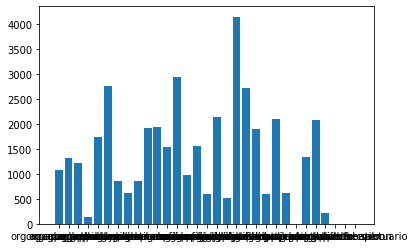

In [23]:
import matplotlib.pyplot as plt

plt.bar(dict_new.keys(),dict_new.values())

<BarContainer object of 31 artists>

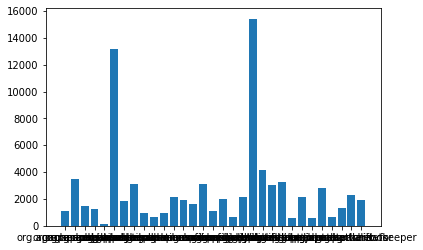

In [24]:
plt.bar(dict_old.keys(),dict_old.values())